# Dataset (https://www.kaggle.com/datasets/kazanova/sentiment140)

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
folder = '/gdrive/MyDrive/deep_learning_course/data/tweets/'

In [4]:
!ls '/gdrive/MyDrive/deep_learning_course/data/tweets/'

 glove.6B.50d.txt
'training.1600000 (1).processed.noemoticon.csv'
 training.1600000.processed.noemoticon.csv


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(folder + "training.1600000.processed.noemoticon.csv", encoding="latin", header=None)

In [10]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df = df.iloc[:,[0, 5]]

In [14]:
df.head()

,0,5
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
df.columns = ['sentiment', 'tweet']

In [17]:
df.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [18]:
df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [9]:
sents = {0:"negatif", 4:"positif"}

In [20]:
sents[0]

'negatif'

In [10]:
df['sentiment'] = df['sentiment'].replace(sents)

In [23]:
df.head()

,sentiment,tweet
0,negatif,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negatif,is upset that he can't update his Facebook by ...
2,negatif,@Kenichan I dived many times for the ball. Man...
3,negatif,my whole body feels itchy and like its on fire
4,negatif,"@nationwideclass no, it's not behaving at all...."


In [24]:
df.sample(10)

,sentiment,tweet
1002560,positif,We'll make a post with links to other reports ...
1426824,positif,@KatyHerndon Zappos... how long have you bee...
1189814,positif,I have decided i am going to blow up apangea
1598714,positif,My fagmA has arrived http://twitpic.com/7jn39
1583054,positif,Looking through Chris Pirillo's list of top 10...
540609,negatif,This job is causing unwanted hair color.
597254,negatif,Is starting to feel amazingly emotional about ...
1530309,positif,@danf2201 I was an English major. I'm now driv...
334730,negatif,it's lightning and raining pretty hard downtow...
192121,negatif,@anneroos Hmm... County Cork ballad still is g...


# Preprocessing

In [11]:
import re

In [12]:
text_cleaning_regex = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"

In [13]:
import nltk

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [16]:
english_stopwords = stopwords.words('english')

In [ ]:
english_stopwords

In [28]:
stemmer = SnowballStemmer('english')

In [29]:
stemmer.stem('cats')

'cat'

In [30]:
def preprocess(text):

  # les mentions les liens et tout ce qui n'est pas alphanumérique
  text_cleaning_regex = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"
  text = re.sub(text_cleaning_regex, " ", str(text).lower().strip())

  tokens = []
  # stopwords and stem
  for word in text.split(" "):
    if word not in english_stopwords:
      word_stem = stemmer.stem(word)
      tokens.append(word_stem)

  cleaned_text = " ".join(tokens).strip()


  return cleaned_text

In [31]:
preprocess("@kevin_degila Hello, I was wondering when your course on deep learning would be available ? http://kevindegila.com")

'hello wonder cours deep learn would avail'

In [32]:
df['text'] = df['tweet'].apply(preprocess)

In [33]:
df.head()

,sentiment,tweet,text
0,negatif,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,negatif,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,negatif,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save 50 rest go bound
3,negatif,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,negatif,"@nationwideclass no, it's not behaving at all....",behav mad see


# Train test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_data, test_data = train_test_split(df, test_size=0.2, stratify=df['sentiment'], random_state=42)

In [37]:
len(train_data)

1280000

In [38]:
len(test_data)

320000

In [40]:
test_data['sentiment'].value_counts()

negatif    160000
positif    160000
Name: sentiment, dtype: int64

In [44]:
def length(text):
  return len(text.split(' '))

In [45]:
df['len'] = df['text'].apply(length)

In [47]:
df['len'].min(), df['len'].max(), df['len'].mean(), df['len'].median()

(1, 50, 7.22946, 7.0)

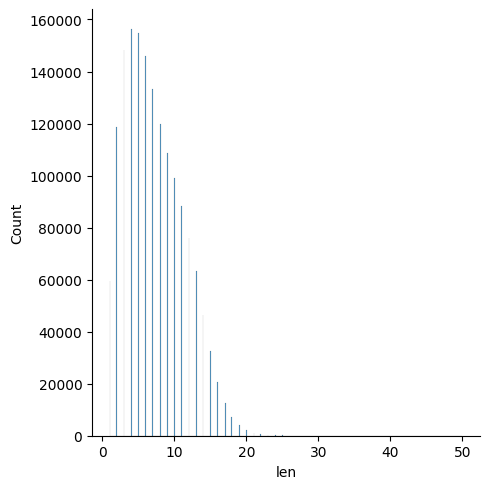

In [48]:
import seaborn as sns
sns.displot(df['len'])

In [46]:
df['len'].describe()

count    1.600000e+06
mean     7.229460e+00
std      4.053380e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      5.000000e+01
Name: len, dtype: float64

# Tokenization and text to sequences

In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [50]:
vocab_size = 70000
maxlen = 15
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['text'])
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_data['text'])
training_padded = pad_sequences(training_sequences, padding="post", maxlen=maxlen, truncating="post")
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_padded = pad_sequences(test_sequences, padding="post", maxlen=15, truncating="post")

In [51]:
training_padded

array([[  13,    3,  297, ...,  902,    0,    0],
       [ 578,  333,  149, ...,    0,    0,    0],
       [  49,  418,   21, ...,    0,    0,    0],
       ...,
       [  48,   12,   36, ...,    0,    0,    0],
       [ 447,   33,  564, ..., 3814,  277,  385],
       [ 212,   28,  774, ...,    0,    0,    0]], dtype=int32)

# Label Encoder

In [52]:
train_data['sentiment']

1036873    positif
287781     negatif
333391     negatif
1484559    positif
562778     negatif
            ...   
1592199    positif
880070     positif
1093760    positif
502113     negatif
1421597    positif
Name: sentiment, Length: 1280000, dtype: object

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
encoder = LabelEncoder()
training_labels = encoder.fit_transform(train_data['sentiment'])

In [55]:
training_labels

array([1, 0, 0, ..., 1, 0, 1])

In [73]:
test_data.shape

(320000, 3)

In [74]:
test_labels = encoder.transform(test_data['sentiment'])

In [69]:
training_labels.shape

(1280000,)

In [76]:
training_labels = training_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

In [75]:
test_labels.shape

(320000,)

# Modeling

In [59]:
import tensorflow as tf

In [60]:
import numpy as np

In [61]:
np.power(70000, 1/4)

16.26576561697786

In [77]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)
h = model.fit(training_padded, training_labels, epochs=50, batch_size=2048,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 45s 70ms/step - loss: 0.5495 - accuracy: 0.7436 - val_loss: 0.4876 - val_accuracy: 0.7708
Epoch 2/50
625/625 [==============================] - 11s 18ms/step - loss: 0.4741 - accuracy: 0.7779 - val_loss: 0.4757 - val_accuracy: 0.7749
Epoch 3/50
625/625 [==============================] - 8s 12ms/step - loss: 0.4613 - accuracy: 0.7832 - val_loss: 0.4719 - val_accuracy: 0.7752
Epoch 4/50
625/625 [==============================] - 5s 7ms/step - loss: 0.4537 - accuracy: 0.7869 - val_loss: 0.4707 - val_accuracy: 0.7755
Epoch 5/50
625/625 [==============================] - 6s 9ms/step - loss: 0.4479 - accuracy: 0.7896 - val_loss: 0.4708 - val_accuracy: 0.7753
Epoch 6/50
625/625 [==============================] - 6s 9ms/step - loss: 0.4430 - accuracy: 0.7922 - val_loss: 0.4719 - val_accuracy: 0.7746
Epoch 7/50
625/625 [==============================] - 4s 6ms/step - loss: 0.4386 - accuracy: 0.7943 - val_loss: 0.4728 - val_accuracy: 0.7748
E

In [78]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

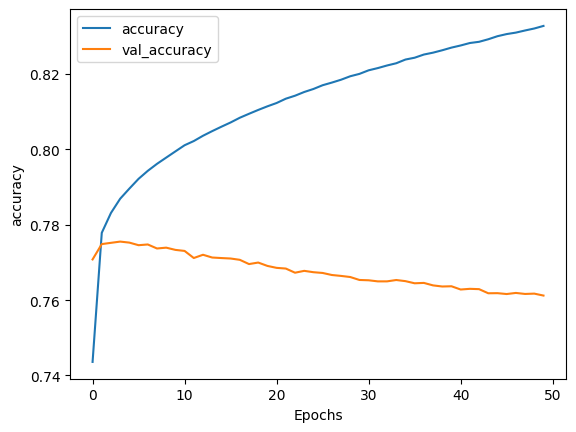

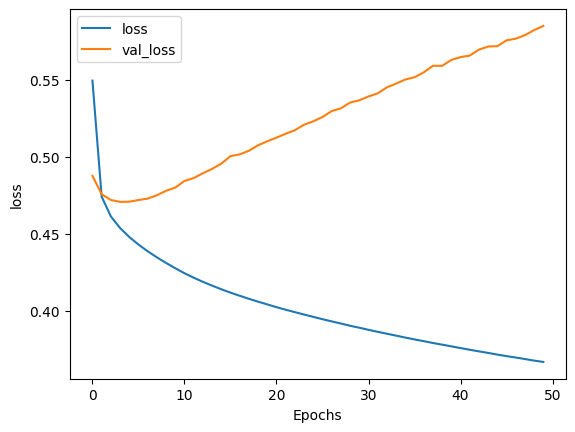

In [79]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

# Recurrent Neural Networks

In [ ]:
"J'étais content, maintenant je suis enervé"  negatif
"J'étais enervé, maintenant je suis content"   positif

In [80]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.SimpleRNN(10),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)

In [81]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 16)          1120000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                270       
                                                                 
 dense_12 (Dense)            (None, 8)                 88        
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,120,367
Trainable params: 1,120,367
Non-trainable params: 0
_________________________________________________________________


In [82]:
h = model.fit(training_padded, training_labels, epochs=50, batch_size=2048,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 59s 88ms/step - loss: 0.5091 - accuracy: 0.7526 - val_loss: 0.4794 - val_accuracy: 0.7732
Epoch 2/50
625/625 [==============================] - 17s 28ms/step - loss: 0.4585 - accuracy: 0.7870 - val_loss: 0.4738 - val_accuracy: 0.7762
Epoch 3/50
625/625 [==============================] - 15s 24ms/step - loss: 0.4408 - accuracy: 0.7960 - val_loss: 0.4776 - val_accuracy: 0.7737
Epoch 4/50
625/625 [==============================] - 12s 20ms/step - loss: 0.4265 - accuracy: 0.8040 - val_loss: 0.4792 - val_accuracy: 0.7724
Epoch 5/50
625/625 [==============================] - 12s 19ms/step - loss: 0.4140 - accuracy: 0.8109 - val_loss: 0.4883 - val_accuracy: 0.7712
Epoch 6/50
625/625 [==============================] - 13s 21ms/step - loss: 0.4037 - accuracy: 0.8166 - val_loss: 0.4930 - val_accuracy: 0.7666
Epoch 7/50
625/625 [==============================] - 13s 21ms/step - loss: 0.3951 - accuracy: 0.8212 - val_loss: 0.5016 - val_accuracy:

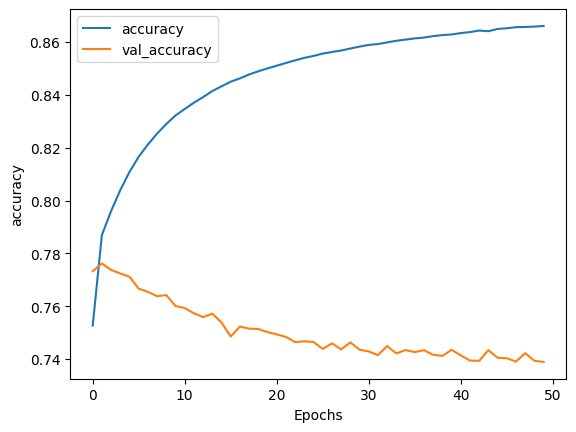

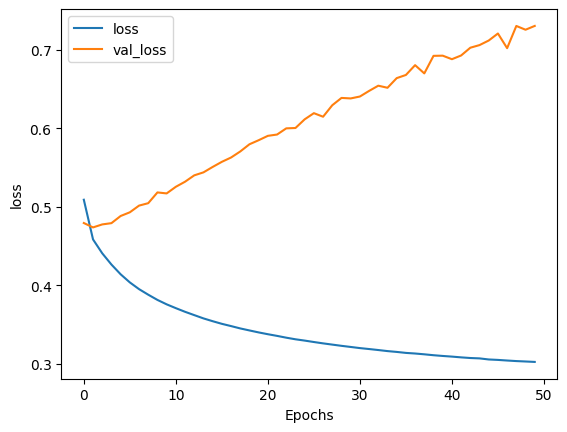

In [83]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

# LSTM

In [ ]:
Je vis en , J'ai vécu dans différentes villes jusque-là, sauf la capital PARIS

In [ ]:
adam = tf.keras.optimizers.Adam()

In [84]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True, dropout=0.25)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)

In [85]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 16)          1120000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 32)         4224      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 8)                 264       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,130,769
Trainable params: 1,130,769
No

In [86]:
h = model.fit(training_padded, training_labels, epochs=50, batch_size=2048,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 60s 82ms/step - loss: 0.4975 - accuracy: 0.7528 - val_loss: 0.4657 - val_accuracy: 0.7776
Epoch 2/50
625/625 [==============================] - 16s 26ms/step - loss: 0.4500 - accuracy: 0.7862 - val_loss: 0.4624 - val_accuracy: 0.7798
Epoch 3/50
625/625 [==============================] - 11s 17ms/step - loss: 0.4359 - accuracy: 0.7933 - val_loss: 0.4666 - val_accuracy: 0.7792
Epoch 4/50
625/625 [==============================] - 11s 17ms/step - loss: 0.4250 - accuracy: 0.7985 - val_loss: 0.4743 - val_accuracy: 0.7784
Epoch 5/50
625/625 [==============================] - 10s 16ms/step - loss: 0.4149 - accuracy: 0.8033 - val_loss: 0.4811 - val_accuracy: 0.7775
Epoch 6/50
625/625 [==============================] - 8s 13ms/step - loss: 0.4054 - accuracy: 0.8081 - val_loss: 0.4933 - val_accuracy: 0.7770
Epoch 7/50
625/625 [==============================] - 8s 12ms/step - loss: 0.3961 - accuracy: 0.8124 - val_loss: 0.5052 - val_accuracy: 0

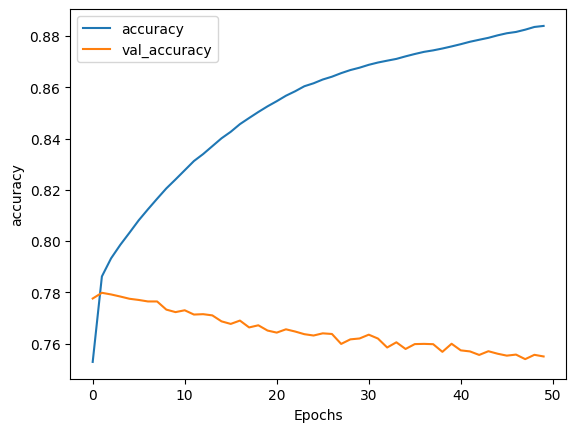

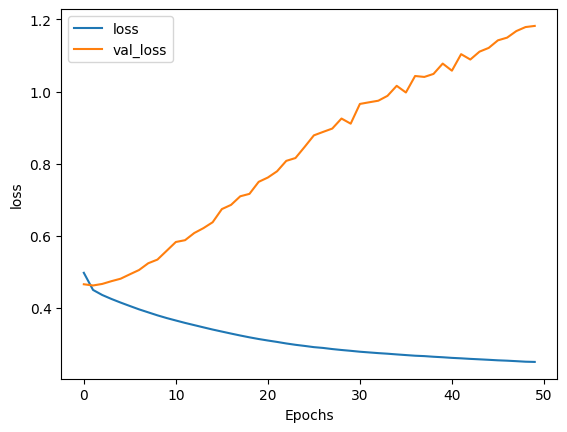

In [87]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

# Transfert Learning

In [88]:
glove_file = folder + "glove.6B.50d.txt"

In [89]:
glove_file

'/gdrive/MyDrive/deep_learning_course/data/tweets/glove.6B.50d.txt'

In [97]:
glove_embeddings = {}

In [101]:
with open(glove_file) as f:
  for line in f:

    values = line.split(" ")
    word = values[0]
    vector = np.asarray(values[1:], dtype="float32")
    glove_embeddings[word] = vector


In [99]:
glove_embeddings

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
       dtype=float32)}

In [100]:
glove_embeddings['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

In [102]:
len(glove_embeddings)

400000

In [103]:
words = word_index.keys()

In [106]:
i = 0
for word in words:
  if glove_embeddings.get(word) is not None:
    i = i + 1
print(i)

56230


In [107]:
len(words)

248676

In [108]:
embedding_matrix = np.zeros((vocab_size, 50))

In [109]:
embedding_matrix.shape

(70000, 50)

In [110]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [119]:
len(word_index)

248676

In [120]:
for word, i in word_index.items():
  if i > vocab_size -1:
    break
  embedding_vector = glove_embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector


In [121]:
embedding_matrix[5]

array([-3.55859995e-01,  5.21300018e-01, -6.10700011e-01, -3.01310003e-01,
        9.48620021e-01, -3.15389991e-01, -5.98309994e-01,  1.21880002e-01,
       -3.19430009e-02,  5.56949973e-01, -1.06210001e-01,  6.33989990e-01,
       -4.73399997e-01, -7.58949965e-02,  3.82470012e-01,  8.15690011e-02,
        8.22139978e-01,  2.22200006e-01, -8.37639999e-03, -7.66200006e-01,
       -5.62529981e-01,  6.17590010e-01,  2.02920005e-01, -4.85979989e-02,
        8.78149986e-01, -1.65489995e+00, -7.74179995e-01,  1.54349998e-01,
        9.48230028e-01, -3.95200014e-01,  3.73020005e+00,  8.28549981e-01,
       -1.41039997e-01,  1.63950007e-02,  2.11150005e-01, -3.60849984e-02,
       -1.55870005e-01,  8.65830004e-01,  2.63090014e-01, -7.10150003e-01,
       -3.67700011e-02,  1.82819995e-03, -1.77039996e-01,  2.70319998e-01,
        1.10260002e-01,  1.41330004e-01, -5.73219992e-02,  2.72069991e-01,
        3.13050002e-01,  9.27709997e-01])

In [123]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, 50, weights=[embedding_matrix], trainable=False),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True, dropout=0.25)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)

In [124]:
h = model.fit(training_padded, training_labels, epochs=50, batch_size=2048,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 17s 13ms/step - loss: 0.5946 - accuracy: 0.6744 - val_loss: 0.5520 - val_accuracy: 0.7128
Epoch 2/50
625/625 [==============================] - 7s 11ms/step - loss: 0.5594 - accuracy: 0.7058 - val_loss: 0.5362 - val_accuracy: 0.7243
Epoch 3/50
625/625 [==============================] - 7s 11ms/step - loss: 0.5500 - accuracy: 0.7138 - val_loss: 0.5289 - val_accuracy: 0.7304
Epoch 4/50
625/625 [==============================] - 7s 12ms/step - loss: 0.5449 - accuracy: 0.7178 - val_loss: 0.5250 - val_accuracy: 0.7334
Epoch 5/50
625/625 [==============================] - 7s 11ms/step - loss: 0.5414 - accuracy: 0.7207 - val_loss: 0.5247 - val_accuracy: 0.7338
Epoch 6/50
625/625 [==============================] - 7s 11ms/step - loss: 0.5388 - accuracy: 0.7226 - val_loss: 0.5222 - val_accuracy: 0.7350
Epoch 7/50
625/625 [==============================] - 7s 11ms/step - loss: 0.5365 - accuracy: 0.7242 - val_loss: 0.5188 - val_accuracy: 0.738

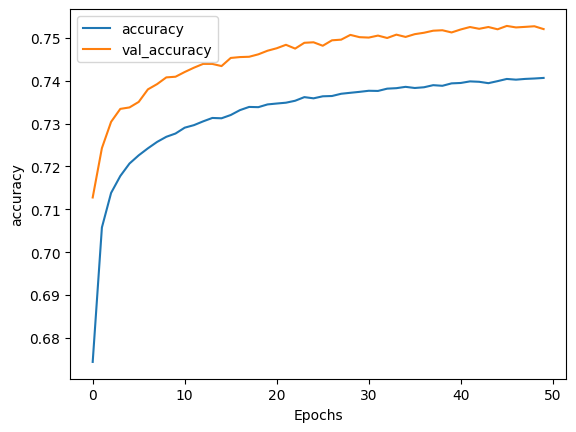

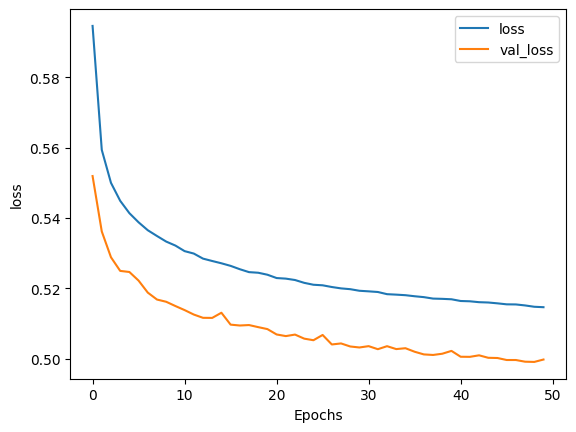

In [125]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")